## Case Study - Developing a Marketing Strategy for a Travel Insurance Company

The goal of this data analysis project is to identify possible differences in travel habits between customers and non-customers from a fictional travel insurance company. New insights from the data might help the company to develop a more efficient marketing strategy, targeting potential customers.

The company has plenty of data on their current customers as well as people who got quotes but never bought insurance. They want to know if there are differences in the travel habits between customers and non-customers.

### 1. Data Inspection

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv('travel_insurance.csv')
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [178]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [179]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

#### 2. Data Cleaning

Given the above information about the dataset, some actions can be taken:

* modifying column names to use <b>snake case format</b> which gives more readability - regex will be useful here
* modify binary string columns (yes/no and employment type) to binary (0/1) - here government employees will be ``0`` and private/self employees ``1``.

In [180]:
# modifying column names with regex
df.rename(columns={'Employment Type': 'EmploymentType'}, inplace=True)
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() for x in df.columns]
df.columns

Index(['age', 'employment_type', 'graduate_or_not', 'annual_income',
       'family_members', 'chronic_diseases', 'frequent_flyer',
       'ever_travelled_abroad', 'travel_insurance'],
      dtype='object')

In [181]:
# modifying binary strings to number format

df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({'Private Sector/Self Employed': 1, 'Government Sector': 0})
df.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,travel_insurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


#### Checking for duplicates

Given that the dataset come from a reliable source, the company itself, we should not worry much about duplicates, but still worth checking. The problem with this dataset is data it does not contain an primary key, like an id, so there may be identical charactistics that are shared among different people.
We could check that and see how many rows are duplicated.

In [182]:
n_duplicates = df.duplicated().sum()
print(n_duplicates)

n_duplicates/df.shape[0]

738


0.3714141922496225

So that are 738 rows that are equal to each other, which is about 37% of the dataset. A decision in this case will be to make an assumption that each row is a different client. One could also drop the duplicates and work with a smaller dataset.

#### Identifying Outliers
Next, some columns may contain outliers which could warm the analysis. The columns `annual_income`, `age` and `family_member` have a range of values, which make them good candidates for outliers.

Below graphs show that there are none. The data is ready to explore.

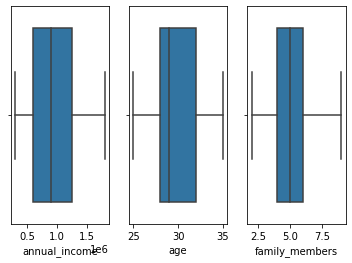

In [183]:
fig, ax = plt.subplots(1,3)
sns.boxplot(ax=ax[0], x='annual_income', data=df)
sns.boxplot(ax=ax[1], x='age', data=df)
sns.boxplot(ax=ax[2], x='family_members', data=df)
plt.show()

### 3. Exploratory Data Analysis

Given the requirements, is known that `travel_insurance` is the independent variable (the variable we want to predict). The company wants to create an effective marketing strategy by targeting customers that are more likely to buy travel insurance.

To observe the dataset as a whole, the ``.hist()`` method helps visualize the distribution for each numerical column.

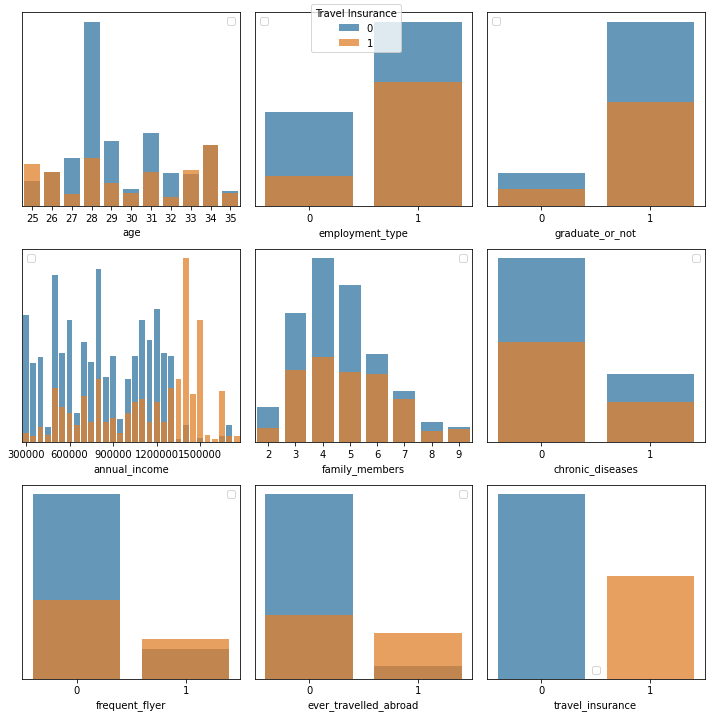

In [184]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
for j in range(3):
    for i, column in zip(range(3), df.columns[j*3:]): 
        g = sns.countplot(x=column, data=df, hue='travel_insurance', dodge=False, alpha=0.75, ax=ax[j,i])
        ax[j,i].legend([])
        g.set_yticks([])
        g.set_ylabel('')
        ax[j,i].xaxis.set_major_locator(plt.MaxNLocator(5)) if column == 'annual_income' else None
            

fig.legend(*ax[0,0].get_legend_handles_labels(), loc='upper center', title='Travel Insurance')
plt.tight_layout()

The histograms provide some key hypothesis:

* Most people with ages ranging from 25-26 and 33-35 are likely to buy insurance. In contrast, people with ages ranging from age 27-32 are less likely to buy insurance.
* Private sector or self employed people has a slightly higher chance to buy insurance, but most still doesn't.
* It appears that ``graduation`` is not a relevant factor to explore, since graduated and non-graduated individuals all have similar percentage of travel insurance buyers. Same for `chronic diseases`.
* The majority of higher income individuals (more than 1.35mi annually) have travel insurance. This is an important finding.
* People from families with 6 or more members are more likely to have a travel insurance compared to smaller families.
* Frequent flyers and people who travelled abroad are more likely to buy travel insurance.

It's important to transform these findings into quantitative data, collecting statistics to support the hypothesis.

#### 3.1 Age vs Travel Insurance

In [185]:
df_age = df[['age', 'travel_insurance']].copy() # copy creates a new df instead of a view

df_age.loc[df_age['age'].between(0, 26, inclusive='both'), 'age_range'] = '25-26'
df_age.loc[df_age['age'].between(27, 32, inclusive='both'), 'age_range'] = '27-32'
df_age.loc[df_age['age'].between(33, 60, inclusive='both'), 'age_range'] = '33-35'

df_age.groupby('age_range').mean().drop(columns='age')

,travel_insurance
age_range,
25-26,0.564626
27-32,0.250205
33-35,0.504219


#### 3.2 Employment Type vs Travel Insurance

In [186]:
df_et = df[['employment_type', 'travel_insurance']].copy()
df_et.groupby('employment_type').mean()

,travel_insurance
employment_type,
0,0.245614
1,0.402258


#### 3.3 Graduation vs Travel Insurance

In [187]:
df_g = df[['graduate_or_not', 'travel_insurance']].copy()
df_g.groupby('graduate_or_not').mean()

,travel_insurance
graduate_or_not,
0,0.335593
1,0.361111


#### 3.4 Income vs Travel Insurance

In [188]:
df_i = df[['annual_income', 'travel_insurance']].copy() # copy creates a new df instead of a view

df_i.loc[df_i['annual_income'].between(0, 1350000, inclusive='both'), 'income_range'] = '0-1.35m'
df_i.loc[df_i['annual_income'].between(1350000, 2000000, inclusive='both'), 'income_range'] = '1.35-2mi'

df_i.groupby('income_range').mean().drop(columns='annual_income')

,travel_insurance
income_range,
0-1.35m,0.239316
1.35-2mi,0.911175


#### 3.5 Family Size vs Travel Insurance

In [189]:
df_fs = df[['family_members', 'travel_insurance']].copy() # copy creates a new df instead of a view

df_fs.loc[df_fs['family_members'].between(0, 5, inclusive='both'), 'family_range'] = '0-5'
df_fs.loc[df_fs['family_members'].between(6, 10, inclusive='both'), 'family_range'] = '6-9'

df_fs.groupby('family_range').mean().drop(columns='family_members')

,travel_insurance
family_range,
0-5,0.323340
6-9,0.438567


#### 3.6 Chronic Diseases vs Travel Insurance

In [190]:
df_cd = df[['chronic_diseases', 'travel_insurance']].copy()
df_cd.groupby('chronic_diseases').mean()

,travel_insurance
chronic_diseases,
0,0.351916
1,0.371377


#### 3.7 Travelled Abroad vs Travel Insurance

In [191]:
df_ta = df[['ever_travelled_abroad', 'travel_insurance']].copy()
df_ta.groupby('ever_travelled_abroad').mean()

,travel_insurance
ever_travelled_abroad,
0,0.256378
1,0.784211


#### 3.8 Frequent Flyers vs Travel Insurance

In [192]:
df_ff = df[['frequent_flyer', 'travel_insurance']].copy()
df_ff.groupby('frequent_flyer').mean()

,travel_insurance
frequent_flyer,
0,0.300000
1,0.573141


To target ideal clients, there are several approachs to define a strategy. If the company wants to be effective, they may select the groups that have a higher probability of buying insurance. For example, it would be best in this case to neglect the family size because it has a small difference between groups (which are also harder to identify in a online marketing approach), and focus on other variables that seem to play a bigger role, like ``income``, `travel_abroad` and `frequent_flyer`.

However, if the company wishes to be more assertive, they may as well target private/self employees (in this case it would be best to investigate if private employees have the same behavior as self employees) and even family size, if they have a way to measure it.

#### 3.9 Correlation Matrix

To increase the confidentiality of the analysis, it's possible to identify potential correlations between the variables by plotting a ``heatmap graph`` of the correlations dataset.

<AxesSubplot:>

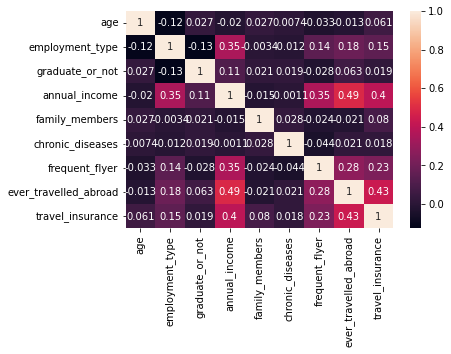

In [193]:
sns.heatmap(df.corr(), annot=True)

In the correlation heatmap above, it's possible to identify that it follows the trends from the distribution plots. The variables with stronger correlations are `ever_travelled_abroad`, `annual_income` and `frequent_flyer`, which makes perfect sense if you think about it. Also, these 3 features also have correlation between each other, which emphasizes the behavior.

`ever_travelled_abroad` and `annual_income` have a moderate correlation, whereas `frequent_flyer` have a weak to moderate correlation, but still worth analyzing.

<AxesSubplot:>

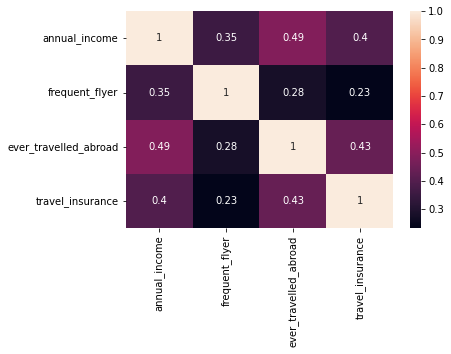

In [194]:
sns.heatmap(df[['annual_income', 'frequent_flyer', 'ever_travelled_abroad',
 'travel_insurance']].corr(), annot=True)

A scatterplot would help to visualize the linear correlation. However, as seen below, it's not ideal. The independent variable is binary, (either 0 or 1), which makes linear regression not a good candidate for analysis.

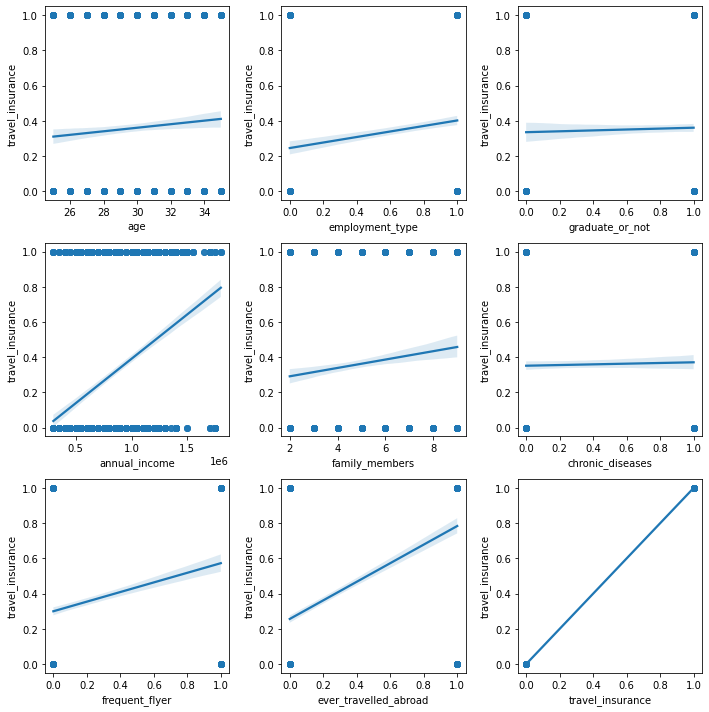

In [195]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
for j in range(3):
    for i, column in zip(range(3), df.columns[j*3:]): 
        try:
            sns.regplot(x=column, y='travel_insurance', data=df, ax=ax[j,i])
        except:
            pass
plt.tight_layout()

#### 4. Building a Model

To validate our analysis, a model can be build to evaluate the assumptions taken from the data exploration. The model could predict the likelihood of a given customer to buy insurance, reinforcing the insights. As new data is added to the dataset, the model can continue to be trained and fine-tuned to help the marketing team to target potential buyers more efficiently.

It's known from that linear regression won't fit the data well enough. Given that the line range is infinity, it would have values outside 0 and 1 range. In this case, a better tool is to use ``logistic regression`` to analyze the probability of a binary outcome (buy travel insurance) given the predictors.

 A logistic regression predicts the probability of an outcome based on a cutoff, usually 0.5. In this case, if the logistic regression model calculates a probability higher than 0.5, the client is likely to buy insurance, and below that, the client is likely not to buy insurance.

Working with the ``scikit-learn`` package will provide the necessary tools to perform the analysis.

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = df[['annual_income', 'ever_travelled_abroad']]
outcome = df[['travel_insurance']]

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.75, shuffle=True, random_state=1)

In [197]:
# scale feature data
scaler = StandardScaler()
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

In [198]:
# training the model
model = LogisticRegression()
model.fit(rescaled_X_train, y_train)

c:\Users\ediga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [199]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(rescaled_X_test)
accuracy = model.score(rescaled_X_test, y_test)

print(f'Accuracy of testing set: {round(accuracy*100,2)}%')

for x, y in zip(features.columns, model.coef_[0]):
    print(f'Coef. value for {x}: {round(y,3)}')

print(f'\n {confusion_matrix(y_test, y_pred)}')

Accuracy of testing set: 77.33%
Coef. value for annual_income: 0.54
Coef. value for ever_travelled_abroad: 0.58

 [[896  64]
 [274 257]]


The accuracy of the model is around 75-80%, and it's a good accuracy given the scenario. Statistically speaking the selected variables are able to predict with this accuracy if a person will buy insurance or not.

Based on the confusion matrix, there is still a higher number of ``false negatives``, meaning that the model classified a person as a non-buyer when it was a buyer. There could be some other factors involved in the analysis, but in order to not be so selective and targeting only a small group of people, focusing on the variables that have the most effect is key. The model used only two variables, ``annual_income`` and ``ever_travelled_abroad``, and still had a good accuracy.

The use of statistics regression reinforced that the variables selected are correct and could potentially improve the marketing efficiency.

#### 5. Conclusion

Given the exploratory analysis of the dataset, it was possible to extract some numbers and generate insights that can enhance marketing actions.

* Among all passengers, 90% of high-income passengers (1.36 million or more) purchased travel insurance. While this percentage remains at 24% for incomes lower than this.

* Apparently, passengers with families over 6 people are also more likely to purchase insurance.

* Passengers who travel more frequently are also more likely to purchase insurance compared to those who don't travel frequently (57% vs 30%).

* Passengers who have already travelled abroad also tend to buy travel insurance, the data indicate that 78% of travellers who have gone to another country have already purchased insurance, while for those who have never travelled abroad, this percentage is in the range of 30%.

* 40% of flyers that work in the private sector or are self-employed buy insurance, whereas flyers that work in the government are less likely to buy, with a percentage of 25%.

Given that in order to have a more effective marketing it's necessary to know better the habits of the clients, a marketing strategy focused on high-income clients and/or have traveled abroad can be effective. This doesn't mean that they should focus on customers with income above 1.35 million, the company may decide to lower the minimum threshold to reach more customers, even if it loses some efficiency.

The company may have an even more specific target group if it decides to also base itself on other variables such as family size, frequency of flights, type of job, but this can segment the target group, and make the process of identifying customers with this profile a lot harder.

**RECOMMENDATIONS**

For a better marketing strategy, the company should focus mainly on:

1. High-income flyers (more than 1 million anually).
2. Flyers who travelled abroad.

Also, if they desire more specificity, other groups can be included:

3. Clients with larger families (6 to 9 people).
4. People that flies frequently.
5. Flyers that work in the private sector or are self-employed.